In [57]:
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
from cycler import cycler
import plotly.express as px
import plotly.graph_objs as go
import datetime

In [2]:
df = pd.read_csv("../data/appliance_energy_usage.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T_out        19735 non-null  float64
 4   Press_mm_hg  19735 non-null  float64
 5   RH_out       19735 non-null  float64
 6   Windspeed    19735 non-null  float64
 7   Tdewpoint    19735 non-null  float64
 8   Visibility   19735 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.4+ MB


In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y %H:%M')

In [4]:
df.head()

,date,Appliances,lights,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,Visibility
0,1/11/2016 17:00,60,30,6.600000,733.5,92.0,7.000000,5.3,63.000000
1,1/11/2016 17:10,60,30,6.483333,733.6,92.0,6.666667,5.2,59.166667
2,1/11/2016 17:20,50,30,6.366667,733.7,92.0,6.333333,5.1,55.333333
3,1/11/2016 17:30,50,40,6.250000,733.8,92.0,6.000000,5.0,51.500000
4,1/11/2016 17:40,60,40,6.133333,733.9,92.0,5.666667,4.9,47.666667


In [5]:
df.tail()

,date,Appliances,lights,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,Visibility
19730,5/27/2016 17:20,100,0,22.733333,755.2,55.666667,3.333333,13.333333,23.666667
19731,5/27/2016 17:30,90,0,22.600000,755.2,56.000000,3.500000,13.300000,24.500000
19732,5/27/2016 17:40,270,10,22.466667,755.2,56.333333,3.666667,13.266667,25.333333
19733,5/27/2016 17:50,420,10,22.333333,755.2,56.666667,3.833333,13.233333,26.166667
19734,5/27/2016 18:00,430,10,22.200000,755.2,57.000000,4.000000,13.200000,27.000000


In [6]:
df.describe(include="all")

,date,Appliances,lights,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,Visibility
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
unique,19735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1/11/2016 17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,97.694958,3.801875,7.411665,755.522602,79.750418,4.039752,3.760707,38.330834
std,NaN,102.524891,7.935988,5.317409,7.399441,14.901088,2.451221,4.194648,11.794719
min,NaN,10.000000,0.000000,-5.000000,729.300000,24.000000,0.000000,-6.600000,1.000000
25%,NaN,50.000000,0.000000,3.666667,750.933333,70.333333,2.000000,0.900000,29.000000
50%,NaN,60.000000,0.000000,6.916667,756.100000,83.666667,3.666667,3.433333,40.000000
75%,NaN,100.000000,0.000000,10.408333,760.933333,91.666667,5.500000,6.566667,40.000000


In [7]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=["Total","Percent"])

In [8]:
missing_data

,Total,Percent
date,0,0.0
Appliances,0,0.0
lights,0,0.0
T_out,0,0.0
Press_mm_hg,0,0.0
RH_out,0,0.0
Windspeed,0,0.0
Tdewpoint,0,0.0
Visibility,0,0.0


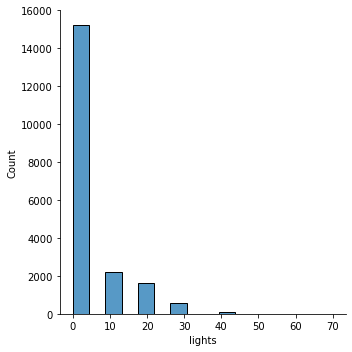

In [9]:
sns.displot(df["lights"])

In [10]:
print("Skewness value", df["lights"].skew())
print(f'Kurtosis value {df["lights"].kurt()}')

Skewness value 2.1951550406999196
Kurtosis value 4.46214661893649


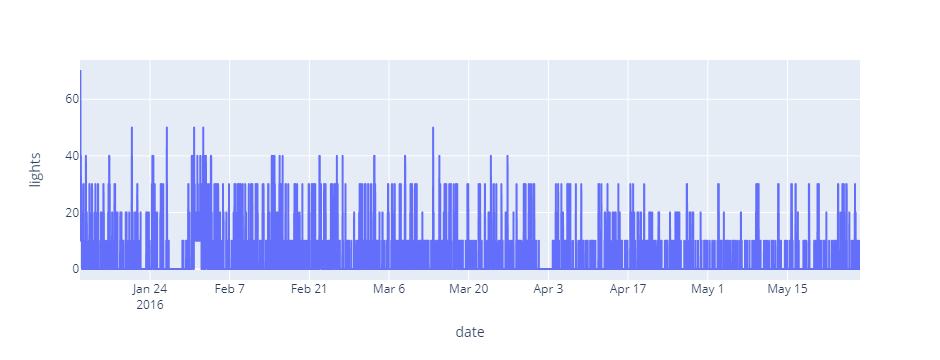

In [51]:
fig = px.line(df, x='date', y="lights")
fig.show()

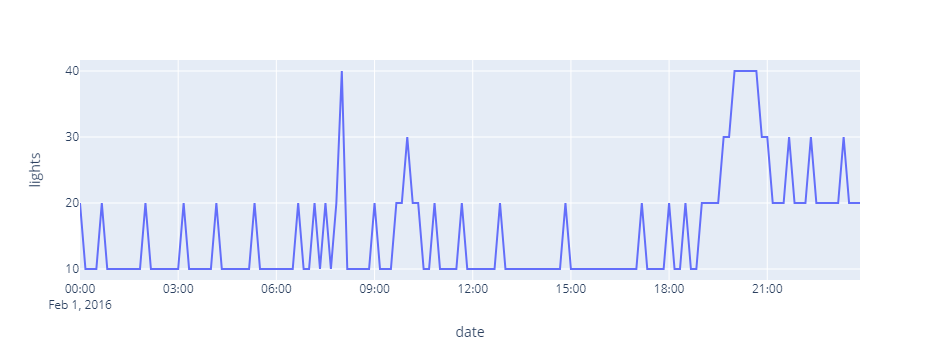

In [61]:
fig = px.line(df.loc[df["date"].dt.strftime('%Y-%m-%d') == '2016-02-01'], x='date', y="lights")
fig.show()

<AxesSubplot:xlabel='date'>

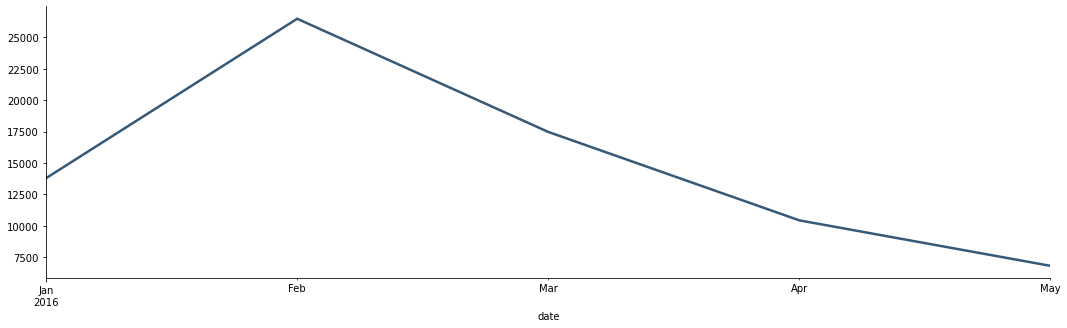

In [62]:
df['lights'].groupby(df.date.dt.to_period("M")).sum().plot()

<AxesSubplot:xlabel='date'>

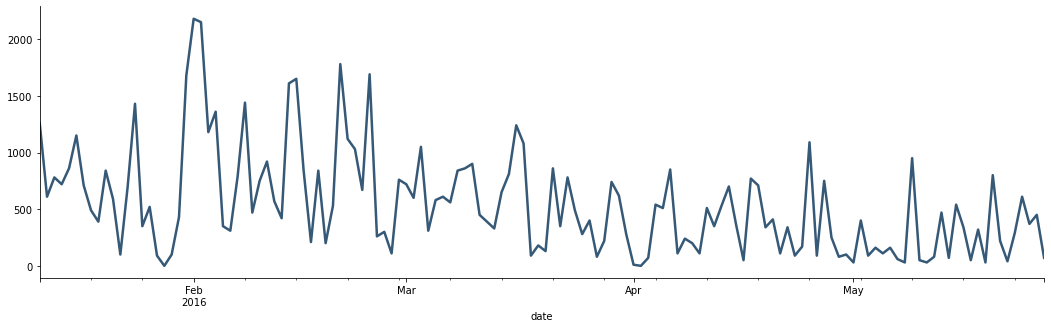

In [46]:
df['lights'].groupby(df.date.dt.to_period("D")).sum().plot()